In [1]:
import json
import os
import re

# def process_json(input_file):
#     with open(input_file, 'r') as f:
#         data = json.load(f)
#
#     output = {}
#     for case in data['metric_per_case']:
#         filename = os.path.basename(case['prediction_file'])
#         numbers = re.findall(r'\d+', filename)
#         data_id = numbers[0] if numbers else 'unknown'
#         dice = case['metrics']['1']['Dice']
#         output[data_id] = dice
#
#     print(json.dumps(output, indent=4))

def process_json(input_file):
    with open(input_file, 'r') as f:
        data = json.load(f)

    output = {}
    for case in data['metric_per_case']:
        filename = os.path.basename(case['prediction_file'])
        numbers = re.findall(r'\d+', filename)
        data_id = numbers[0] if numbers else 'unknown'
        dice = case['metrics']['1']['Dice']
        output[data_id] = dice

    return(output)

In [2]:
# import json
#
# def process_dict(dice_dict):
#     # 指定子数据集的大小
#     dataset_sizes = {
#         "1.5T-GE": 71,
#         "1.5T-Phillips": 81,
#         "3T-Achieva": 68,
#         "3T-Ingenia": 78
#     }
#
#     # 创建一个存储每个子数据集的字典的字典
#     datasets = {
#         "1.5T-GE": {},
#         "1.5T-Phillips": {},
#         "3T-Achieva": {},
#         "3T-Ingenia": {}
#     }
#
#     # 创建一个存储结果的字典
#     results = {}
#
#     # 分解主字典到各个子字典
#     start = 0
#     for dataset, size in dataset_sizes.items():
#         for i in range(start, start + size):
#             key = f"{i+1:03}"  # 根据字典键的格式，这里应加上1，并以三位数的形式进行格式化
#             if key in dice_dict:
#                 datasets[dataset][key] = dice_dict[key]
#         start += size
#
#     # 计算每个子字典中的dice值的平均数，并生成报告
#     for dataset, dataset_dict in datasets.items():
#         avg_dice = sum(dataset_dict.values()) / len(dataset_dict)
#         results[dataset] = {
#             "average_dice": avg_dice,
#             "details": dataset_dict
#         }
#
#     # 返回结果字典
#     return results

In [3]:
import json

def process_dict(dice_dict):
    # 指定子数据集的大小和顺序
    dataset_sizes = [71, 81, 68, 78]
    dataset_names = ["1.5T-GE", "1.5T-Phillips", "3T-Achieva", "3T-Ingenia"]

    # 创建一个存储每个子数据集的字典的字典
    datasets = {name: {} for name in dataset_names}

    # 创建一个存储结果的字典
    results = {}

    # 分解主字典到各个子字典
    start = 1
    for size, name in zip(dataset_sizes, dataset_names):
        end = start + size
        for key in map(lambda x: f"{x:03}", range(start, end)):
            if key in dice_dict:
                datasets[name][key] = dice_dict[key]
        start = end

    # 计算每个子字典中的dice值的平均数，并生成报告
    for name, dataset in datasets.items():
        avg_dice = sum(dataset.values()) / len(dataset)
        results[name] = {
            "average_dice": avg_dice,
            "details": dataset
        }

    # 返回结果字典
    return results

# stratified sampling

In [4]:
# 调用函数
dict_r = process_json('result_json/ss/ss_fold0.json')
print(dict_r)

{'005': 0.812408276020834, '010': 0.9069813021833719, '015': 0.942113760885101, '020': 0.8032148645713235, '025': 0.5834061135371179, '030': 0.6284357461505252, '035': 0.912284730195178, '040': 0.9137450090247771, '045': 0.9333542911034266, '050': 0.9118727050183598, '055': 0.8359316381825761, '060': 0.7513910168534795, '065': 0.8372105438772105, '070': 0.8201803500913538, '075': 0.8921516797231701, '080': 0.5308168681804777, '085': 0.8193787549533427, '090': 0.6505340002703799, '095': 0.48364414552124735, '100': 0.9644307095679573, '105': 0.9751459591692622, '110': 0.9486999297259311, '115': 0.6713999635900236, '120': 0.8550227511375569, '125': 0.7281517542387108, '130': 0.8494408805692852, '135': 0.8437732545414751, '140': 0.9648548351888234, '145': 0.8257884324450134, '150': 0.8876133483955668, '155': 0.7090804798363968, '160': 0.7455583073112954, '165': 0.9245597377237141, '170': 0.9017491626349088, '175': 0.7449222739135368, '180': 0.08695652173913043, '185': 0.7623171604896178, '

In [5]:
# 使用函数
results = process_dict(dict_r)
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8280378819781882,
        "details": {
            "005": 0.812408276020834,
            "010": 0.9069813021833719,
            "015": 0.942113760885101,
            "020": 0.8032148645713235,
            "025": 0.5834061135371179,
            "030": 0.6284357461505252,
            "035": 0.912284730195178,
            "040": 0.9137450090247771,
            "045": 0.9333542911034266,
            "050": 0.9118727050183598,
            "055": 0.8359316381825761,
            "060": 0.7513910168534795,
            "065": 0.8372105438772105,
            "070": 0.8201803500913538
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.805677954201139,
        "details": {
            "075": 0.8921516797231701,
            "080": 0.5308168681804777,
            "085": 0.8193787549533427,
            "090": 0.6505340002703799,
            "095": 0.48364414552124735,
            "100": 0.9644307095679573,
            "105": 0.97514595916926

In [6]:
results = process_dict(process_json('result_json/ss/ss_fold1.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.7981480238824286,
        "details": {
            "001": 0.6316745368688703,
            "006": 0.7710680105022444,
            "011": 0.9528694813450831,
            "016": 0.8035710011727819,
            "021": 0.9148097203117835,
            "026": 0.4391289782244556,
            "031": 0.9489405294656817,
            "036": 0.6721050958788007,
            "041": 0.879273125624255,
            "046": 0.9287933000432509,
            "051": 0.9347125330767381,
            "056": 0.9219923301260707,
            "061": 0.7570442342111992,
            "066": 0.5593632649205262,
            "071": 0.8568742164646886
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8754537024728803,
        "details": {
            "076": 0.8828828828828829,
            "081": 0.8672845752215971,
            "086": 0.9068398312150997,
            "091": 0.7832942167659626,
            "096": 0.8326213592233009,
            "101": 0.928401826484

In [7]:
results = process_dict(process_json('result_json/ss/ss_fold2.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8970979966948179,
        "details": {
            "002": 0.7858704793944491,
            "007": 0.908478221903567,
            "012": 0.9309364020003347,
            "017": 0.7887067395264117,
            "022": 0.8837287323268632,
            "027": 0.8321111539945967,
            "032": 0.890844286032524,
            "037": 0.8990651066450205,
            "042": 0.9587113497500462,
            "047": 0.9223439956818662,
            "052": 0.959271372071798,
            "057": 0.9357917570498916,
            "062": 0.9714666441050805,
            "067": 0.8920457132450029
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8605618692437341,
        "details": {
            "072": 0.9321934728903913,
            "077": 0.9650941943432062,
            "082": 0.7457730854563538,
            "087": 0.8862911795961743,
            "092": 0.9575378538512179,
            "097": 0.7992455499233762,
            "102": 0.92235772357723

In [8]:
results = process_dict(process_json('result_json/ss/ss_fold3.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.7794956097317812,
        "details": {
            "003": 0.7272558828979062,
            "008": 0.4276906171784384,
            "013": 0.9352923841199007,
            "018": 0.8818691876104834,
            "023": 0.7150694525504844,
            "028": 0.8419068890905284,
            "033": 0.42938931297709926,
            "038": 0.9275871435038479,
            "043": 0.9267419071433398,
            "048": 0.7959303299279853,
            "053": 0.8667270214894935,
            "058": 0.8521948832657626,
            "063": 0.7304973653772009,
            "068": 0.8547861591124675
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8207011674078708,
        "details": {
            "073": 0.8640320962888666,
            "078": 0.915643156578657,
            "083": 0.8629410564960228,
            "088": 0.804679376083189,
            "093": 0.9598909214861947,
            "098": 0.9053717666582488,
            "103": 0.969726325986

In [9]:
results = process_dict(process_json('result_json/ss/ss_fold4.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8483322998422309,
        "details": {
            "004": 0.7548443619872192,
            "009": 0.9183151109144916,
            "014": 0.9040421005486508,
            "019": 0.9269567609702416,
            "024": 0.8901617674828476,
            "029": 0.7034345925945786,
            "034": 0.8266382821177342,
            "039": 0.9726395570725939,
            "044": 0.9110491562729274,
            "049": 0.8489160855746881,
            "054": 0.8076690138935342,
            "059": 0.9321082863525156,
            "064": 0.547270082792571,
            "069": 0.9326070392166399
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8017305254147903,
        "details": {
            "074": 0.3417035942885278,
            "079": 0.8725293334946171,
            "084": 0.8131943491976409,
            "089": 0.7298343871010086,
            "094": 0.8451750572986644,
            "099": 0.832463768115942,
            "104": 0.9533499658522

# random sampling

In [10]:
results = process_dict(process_json('result_json/rs/rs_fold0.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8675945507522925,
        "details": {
            "011": 0.9529047182576055,
            "012": 0.9049416134832349,
            "017": 0.7860976918947934,
            "019": 0.9197508896797153,
            "021": 0.9155821250208863,
            "031": 0.9438027658362252,
            "034": 0.8315132605304212,
            "036": 0.6045425599660369,
            "041": 0.9194637637334946,
            "048": 0.7785807869489878,
            "051": 0.9234487135673485,
            "053": 0.8720852764823451,
            "054": 0.8258477150105407,
            "055": 0.8618588633260652,
            "056": 0.9423859182013165,
            "058": 0.8380465463066518,
            "069": 0.9282541545433058
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.869831505847073,
        "details": {
            "072": 0.9051771056636048,
            "074": 0.4683038263849229,
            "086": 0.9179900934483991,
            "088": 0.738004640371

In [11]:
results = process_dict(process_json('result_json/rs/rs_fold1.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8704920885694447,
        "details": {
            "010": 0.9020827591637466,
            "015": 0.8946698400398516,
            "016": 0.7841942348616754,
            "018": 0.8472432777467486,
            "020": 0.8661907257008121,
            "028": 0.7693412548149116,
            "040": 0.9150153386949672,
            "043": 0.9485267309668225,
            "045": 0.92950938532184,
            "050": 0.9023874282260501,
            "068": 0.8512168571650727,
            "071": 0.8355272301308396
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8183152302228323,
        "details": {
            "076": 0.9100242406958505,
            "090": 0.6365500363780673,
            "098": 0.8724040041834753,
            "100": 0.9726035681886906,
            "111": 0.9129903113535885,
            "114": 0.7596845279517513,
            "121": 0.6183196711222706,
            "129": 0.9207512597343106,
            "133": 0.7881464200411

In [12]:
results = process_dict(process_json('result_json/rs/rs_fold2.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.8019210216270407,
        "details": {
            "002": 0.7934782608695652,
            "003": 0.6862958205710898,
            "005": 0.722382762991128,
            "014": 0.9336756667218817,
            "025": 0.48843271423916584,
            "026": 0.477795356709224,
            "027": 0.8501030927835052,
            "029": 0.6958597459088136,
            "032": 0.8775070821529745,
            "049": 0.9223176911213924,
            "052": 0.9833397165836845,
            "057": 0.9344436758367477,
            "062": 0.9857078913674832,
            "067": 0.8755548249219135
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8435624546365135,
        "details": {
            "079": 0.8791520818544538,
            "080": 0.591910555738244,
            "085": 0.8527729751296715,
            "087": 0.9455505721591148,
            "093": 0.9771480804387569,
            "094": 0.8598048271153769,
            "095": 0.5897530409141

In [13]:
results = process_dict(process_json('result_json/rs/rs_fold3.json'))
print(json.dumps(results, indent=4))

{
    "1.5T-GE": {
        "average_dice": 0.7356940243437223,
        "details": {
            "001": 0.5841458245019076,
            "004": 0.76710106243785,
            "007": 0.9083390269337265,
            "008": 0.37935943060498223,
            "009": 0.9406925873436441,
            "022": 0.8811538189616572,
            "033": 0.2926829268292683,
            "038": 0.9317479364386749,
            "046": 0.9333827227886846,
            "059": 0.913223195772858,
            "061": 0.7662611460565425,
            "064": 0.5971549560057814,
            "066": 0.5797067775738284,
            "070": 0.8247649285627061
        }
    },
    "1.5T-Phillips": {
        "average_dice": 0.8380868002172274,
        "details": {
            "091": 0.7715470975602681,
            "103": 0.9599425798072322,
            "112": 0.9323965497336434,
            "115": 0.7297830374753451,
            "117": 0.8671071953010279,
            "122": 0.756181934657271,
            "124": 0.72425112843660

# cross validation

In [14]:
dict_ge = process_json('result_json/ge.json')
print(dict_ge)

{'001': 0.6307977736549165, '002': 0.7572847410325864, '003': 0.762743628185907, '004': 0.7590680296819055, '005': 0.8029771338012226, '006': 0.8201739712278354, '007': 0.8261387317654064, '008': 0.4037990562093065, '009': 0.8751968567856737, '010': 0.884090085008662, '011': 0.924439523941323, '012': 0.8423234776781975, '013': 0.9607180984335171, '014': 0.9380215391198916, '015': 0.8606164383561644, '016': 0.7919326755658734, '017': 0.8238158477202302, '018': 0.8849390513970999, '019': 0.9402196014640097, '020': 0.8069974189848007, '021': 0.9152630503816227, '022': 0.8782263084805823, '023': 0.7011113277441996, '024': 0.8402475964704333, '025': 0.5857699805068226, '026': 0.4490046605729976, '027': 0.8033215152080612, '028': 0.8853820598006644, '029': 0.7121993593571855, '030': 0.677721813250678, '031': 0.9497348652231551, '032': 0.876448087431694, '033': 0.29497206703910617, '034': 0.8986157517899761, '035': 0.8821943871888378, '036': 0.637784371909001, '037': 0.8551464063886424, '038'

In [15]:
dict_phillips = process_json('result_json/phillips.json')
print(dict_phillips)

{'001': 0.8978322632603297, '002': 0.9234049812350733, '003': 0.2356115107913669, '004': 0.8493906192293488, '005': 0.9396449704142011, '006': 0.8813831066456457, '007': 0.9507192707591511, '008': 0.8773969539942658, '009': 0.40214477211796246, '010': 0.9005583734708665, '011': 0.7985026933260294, '012': 0.8109341770838736, '013': 0.8072070840028719, '014': 0.7745664739884393, '015': 0.9170036288232245, '016': 0.8027468624200805, '017': 0.7228736273962405, '018': 0.7384608615303384, '019': 0.6658921161825726, '020': 0.7977295194362065, '021': 0.8696077898057988, '022': 0.9213266072770205, '023': 0.9538420371939527, '024': 0.5102140872691616, '025': 0.8741130091984232, '026': 0.8151260504201681, '027': 0.8946255378108364, '028': 0.8141270197486535, '029': 0.9700367532548433, '030': 0.8751613180762282, '031': 0.8723661903608622, '032': 0.9394078737929327, '033': 0.9529068150208623, '034': 0.9164746852397535, '035': 0.9024056567519791, '036': 0.9290547330340992, '037': 0.8176470588235294,

In [16]:
dict_achieva = process_json('result_json/achieva.json')
print(dict_achieva)

{'001': 0.6174064291696193, '002': 0.7197055067237623, '003': 0.6723569453307807, '004': 0.6729857819905213, '005': 0.5448834019204389, '006': 0.8095385863986824, '007': 0.696521143329929, '008': 0.7928567133666046, '009': 0.6500918554807104, '010': 0.4850234925606891, '011': 0.6590594180454805, '012': 0.940036385688296, '013': 0.8869356032568467, '014': 0.7624750499001997, '015': 0.8792987188132164, '016': 0.9149881849893102, '017': 0.7305505685218432, '018': 0.8964282569776656, '019': 0.8761533391915641, '020': 0.8611006549725213, '021': 0.7408185598599256, '022': 0.8052799659357036, '023': 0.724888946392375, '024': 0.8351292184345948, '025': 0.44979820443126595, '026': 0.6942125765164162, '027': 0.8481588325131512, '028': 0.533678756476684, '029': 0.6461278036394413, '030': 0.82562422325161, '031': 0.9401616073378467, '032': 0.8263764820529479, '033': 0.8233867054827754, '034': 0.8250943512961703, '035': 0.8639701930999892, '036': 0.7414798390408146, '037': 0.594064624953877, '038':

In [17]:
dict_ingenia = process_json('result_json/ingenia.json')
print(dict_ingenia)

{'001': 0.8230714494998116, '002': 0.8493460457156827, '003': 0.797913082089138, '004': 0.6284023283795649, '005': 0.8175481133505077, '006': 0.9326298188051962, '007': 0.510038240917782, '008': 0.6960501497836459, '009': 0.9616595009086477, '010': 0.8096513403248817, '011': 0.7419831535392345, '012': 0.7039221390600618, '013': 0.8633394303632088, '014': 0.9193152870033093, '015': 0.9044664184581716, '016': 0.8930881071412191, '017': 0.8749352219727069, '018': 0.9173023875202131, '019': 0.8284268378951951, '020': 0.8120127700645927, '021': 0.7216224825682228, '022': 0.835462594331214, '023': 0.8724048849224988, '024': 0.9723404255319149, '025': 0.7938058368076236, '026': 0.851966786882496, '027': 0.8290392389040873, '028': 0.1739343459088682, '029': 0.8538344196366662, '030': 0.7984768770165392, '031': 0.6639531420629405, '032': 0.8924026224450443, '033': 0.9218661647262953, '034': 0.8936669874879692, '035': 0.954265717388681, '036': 0.9147239551573714, '037': 0.9512731351654515, '038'

In [18]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_and_get_keys(dic):
    # 将字典值转为numpy数组
    values = np.array(list(dic.values()))

    # 生成直方图的bins
    bins = np.arange(0, 1.1, 0.1)

    # 绘制直方图
    plt.hist(values, bins=bins, edgecolor='black')

    # 设置图形的标题和坐标轴标签
    plt.title('Histogram of Dice')
    plt.xlabel('Dice')
    plt.ylabel('Frequency')

    # 显示图形
    plt.show()

    # 返回所有值小于0.6的键
    keys_less_than_0_6 = [key for key, value in dic.items() if value < 0.6]
    return keys_less_than_0_6

In [19]:
import matplotlib.pyplot as plt
import numpy as np

def plot_histogram_and_get_keys_achieva(dic):
    # 将字典值转为numpy数组
    values = np.array(list(dic.values()))

    # 生成直方图的bins
    bins = np.arange(0, 1.1, 0.1)

    # 绘制直方图
    plt.hist(values, bins=bins, edgecolor='black')

    # 设置图形的标题和坐标轴标签
    plt.title('Histogram of Dice')
    plt.xlabel('Dice')
    plt.ylabel('Frequency')

    # 显示图形
    plt.show()

    # 返回所有值小于0.6的键
    keys_less_than_0_6 = [key for key, value in dic.items() if value < 0.7]
    return keys_less_than_0_6

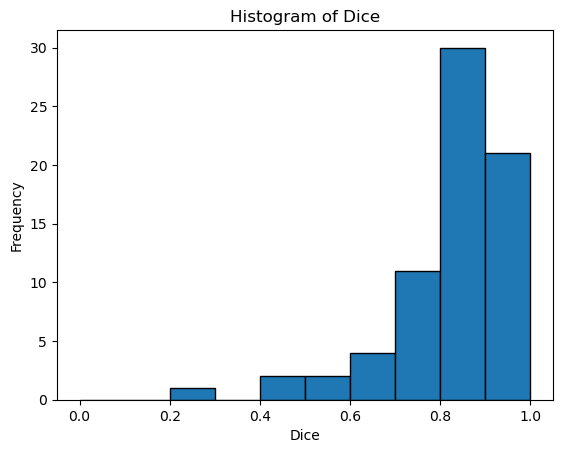

['008', '025', '026', '033', '066']


In [20]:
ge_keys = plot_histogram_and_get_keys(dict_ge)
print(ge_keys)

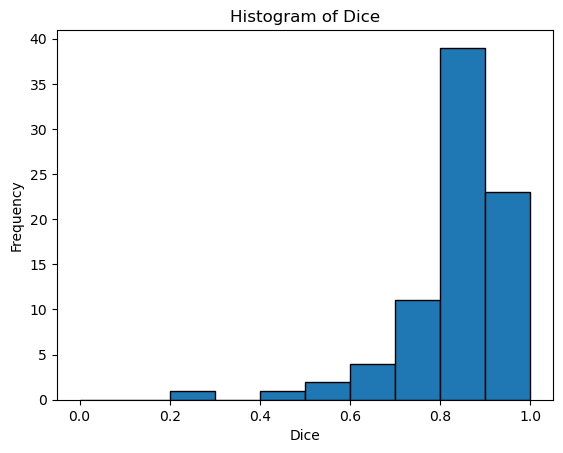

['003', '009', '024', '051']


In [21]:
phillips_keys = plot_histogram_and_get_keys(dict_phillips)
print(phillips_keys)

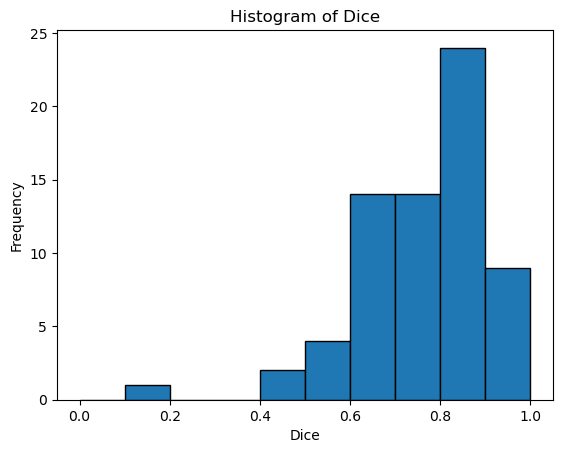

['005', '010', '025', '028', '037', '038', '047']


In [24]:
achieva_keys = plot_histogram_and_get_keys(dict_achieva)
print(achieva_keys)

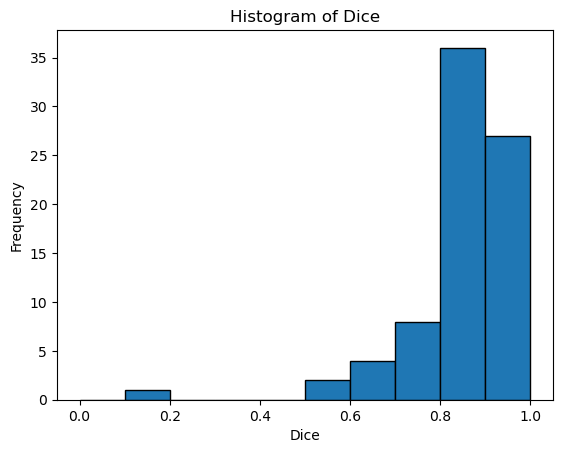

['007', '028', '071']


In [23]:
ingenia_keys = plot_histogram_and_get_keys(dict_ingenia)
print(ingenia_keys)